# Comparative Analysis of CNN and Transfer Learning for Flower Image Classification

This project is part of an image classification approach applied to a dataset composed of photographs of four different flower species. The objective is to design, evaluate, and compare several convolutional neural network (CNN) approaches in order to analyze their ability to visually discriminate between these classes.

# I-Baseline CNN

## 1. Architecture and Training




In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.data import AUTOTUNE

# Load the dataset from the specified directory
# The data must be organized in subfolders, one per class
train_ds = image_dataset_from_directory(
    '/content/drive/MyDrive/jpg',       # Dataset path
    validation_split=0.2,               # 20% of the data for validation
    subset="training",                  # Use the training portion
    seed=123,                           # Ensure reproducibility
    image_size=(128, 128),              # Resize all images to 128x128
    batch_size=16                       # Process images in batches of 16
)

val_ds = image_dataset_from_directory(
    '/content/drive/MyDrive/jpg',
    validation_split=0.2,
    subset="validation",               # Use the validation portion
    seed=123,
    image_size=(128, 128),
    batch_size=16
)

# Extract the list of class names BEFORE prefetching
class_names = train_ds.class_names
print("Classes:", class_names)

# Prefetch the data to improve performance during training
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


Found 320 files belonging to 4 classes.
Using 256 files for training.
Found 320 files belonging to 4 classes.
Using 64 files for validation.
Classes: ['0', '2', '4', '9']


In [ ]:
# Build and train a custom CNN on the dataset

from tensorflow.keras import layers, models, callbacks

# Define a CNN model with 4 convolutional layers
model = models.Sequential([
    # Input layer matching the image dimensions
    layers.Input(shape=(128, 128, 3)),

    # First convolution + max pooling
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Second convolution + max pooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Third convolution + max pooling
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Fourth convolution + max pooling
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Flatten the feature maps
    layers.Flatten(),

    # Dense (fully connected) layer
    layers.Dense(512, activation='relu'),

    # Dropout to prevent overfitting
    layers.Dropout(0.5),

    # Output layer for 4-class classification
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',                                # Adaptive optimizer
    loss='sparse_categorical_crossentropy',          # Suitable for integer labels
    metrics=['accuracy']                             # Track accuracy during training
)

# Add early stopping to prevent overfitting
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Show the model architecture and number of parameters
model.summary()

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stop]                           # Stop early if no progress
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,602,692 (9.93 MB)

 Trainable params: 2,602,692 (9.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.2678 - loss: 31.6583 - val_accuracy: 0.6562 - val_loss: 0.8308
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 781ms/step - accuracy: 0.6309 - loss: 0.8604 - val_accuracy: 0.6719 - val_loss: 0.8286
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 788ms/step - accuracy: 0.7610 - loss: 0.6661 - val_accuracy: 0.8125 - val_loss: 0.5871
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8260 - loss: 0.5456 - val_accuracy: 0.7812 - val_loss: 0.5299
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 779ms/step - accuracy: 0.8655 - loss: 0.3439 - val_accuracy: 0.8281 - val_loss: 0.5110
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 644ms/step - accuracy: 0.8871 - loss: 0.3068 - val_accuracy: 0.7656 - val_loss: 0.4820
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 791ms/step - accuracy: 0.9471 - loss: 0.1727 - val_accuracy: 0.7344 - val_loss: 0.6894
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 876ms/step - accuracy: 0.8706 - loss: 0.4020 - val_accuracy:

Evaluation tools:
- Accuracy and loss curves (to monitor learning progress and detect overfitting)
- Confusion matrix (to analyze classification errors and class-wise performance)
- Classification report (precision, recall, F1-score for each class)
- Validation split (to evaluate generalization during training)

Model improvements: I implement some techniques to imporve the model's generalization and stability during training.
- Added a Dropout layer after the dense layer to reduce overfitting by randomly deactivating neurons during training.
- Introduced an EarlyStopping callback to monitor the validation loss and stop training automatically if the model stops improving for several epochs, preventing over-training.
- Chose a sufficiently deep architecture (4 convolutional layers) to extract complex image features.



## 2. Model Evaluation and Performance Analysis


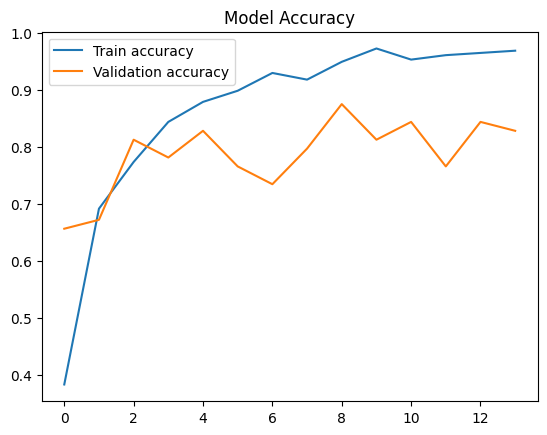

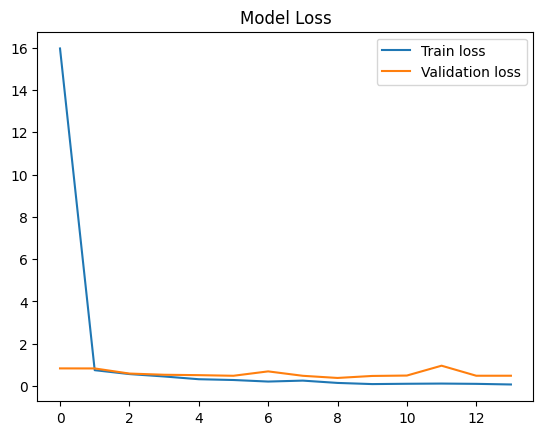

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Confusion Matrix:
[[16  1  1  1]
 [ 0 15  4  0]
 [ 0  0 13  0]
 [ 1  0  0 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           2       0.94      0.79      0.86        19
           4       0.72      1.00      0.84        13
           9       0.92      0.92      0.92        13

    accuracy                           0.88        64
   macro avg       0.88      0.89      0.88        64
weighted avg       0.89      0.88      0.88        64



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Learning curves
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title("Model Loss")
plt.show()

# Confusion matrix and classification report
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))



## Evaluation of Model Reliability

The model achieves an overall accuracy of **88%** on the validation set, which indicates strong performance.

### Observations:
- **Class 4** is perfectly recalled (100%), meaning all true instances are correctly identified, but its lower precision (72%) shows some false positives.
- **Class 2** has excellent precision (94%) but lower recall (79%), suggesting some true class 2 images were misclassified.
- The **confusion matrix** confirms that most confusion occurs between class 2 and class 4.
- **Class 0 and 9** are well distinguished with high precision and recall (≥ 0.84).

### Accuracy Analysis
- Training accuracy increases rapidly and reaches 98%, showing strong learning.
- Validation accuracy peaks around 85%, with small oscillations across epochs.
- The gap between training and validation accuracy is moderate, suggesting some overfitting, but nothing critical.

### Loss Analysis
- The training loss drops quickly to near-zero, while validation loss remains low and stable.
- Slight fluctuations in validation loss are expected due to batch variability and limited dataset size.

### Conclusion:
There is **no significant overfitting**: validation accuracy is strong and confusion is mostly limited to semantically similar classes. The model can be considered **reliable** for this classification task.
The model shows good learning capability and acceptable generalization. Minor overfitting is present but controlled by Dropout and EarlyStopping. Overall, the model is reliable and performs consistently on unseen validation data.


#II- Transfer Learning with DenseNet121

## 1. Architecture and Training

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras import layers, Model, Input

# Load the DenseNet121 model without the top classification layer
# We use pre-trained weights from ImageNet to take advantage of transfer learning
base_model = DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(128, 128, 3)
)

# Freeze the pre-trained layers to avoid updating their weights during training
base_model.trainable = False

# Define the input layer for our new model
inputs = Input(shape=(128, 128, 3))

# Apply the preprocessing function required by DenseNet121
x = preprocess_input(inputs)

# Pass the inputs through the frozen DenseNet121 base
x = base_model(x, training=False)

# Add a global average pooling layer to reduce the output dimensions
x = layers.GlobalAveragePooling2D()(x)

# Add a dense layer to learn new features for our specific task
x = layers.Dense(256, activation='relu')(x)

# Add a dropout layer to prevent overfitting
x = layers.Dropout(0.5)(x)

# Add the final output layer with softmax activation for 4-class classification
outputs = layers.Dense(4, activation='softmax')(x)

# Create the complete model
densenet_model = Model(inputs, outputs)

# Compile the model using the Adam optimizer and a suitable loss for integer labels
densenet_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display the architecture and number of parameters of the model
densenet_model.summary()

# Train the model on the same dataset as the custom CNN
history_densenet = densenet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stop]
)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ add (Add)                       │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_1 (TrueDivide)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 4, 4, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,300,932 (27.85 MB)

 Trainable params: 263,428 (1.00 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.4752 - loss: 1.8340 - val_accuracy: 0.9531 - val_loss: 0.1470
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9563 - loss: 0.1770 - val_accuracy: 0.9688 - val_loss: 0.0954
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9972 - loss: 0.0369 - val_accuracy: 0.9531 - val_loss: 0.1180
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9843 - loss: 0.0417 - val_accuracy: 0.9844 - val_loss: 0.0728
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9987 - loss: 0.0154 - val_accuracy: 0.9844 - val_loss: 0.0541
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9869 - loss: 0.0268 - val_accuracy: 0.9531 - val_loss: 0.0776
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 0.9531 - val_loss: 0.0964
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.9531 - val_loss:

## 2. Model Evaluation and Performance Analysis

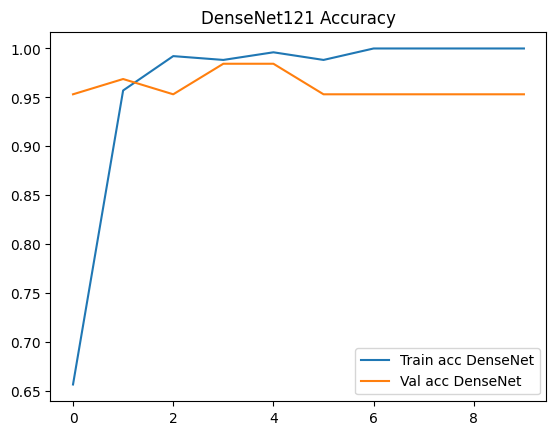

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Confusion Matrix:
[[19  0  0  0]
 [ 0 19  0  0]
 [ 0  0 13  0]
 [ 1  0  0 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           2       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        13
           9       1.00      0.92      0.96        13

    accuracy                           0.98        64
   macro avg       0.99      0.98      0.98        64
weighted avg       0.99      0.98      0.98        64



In [ ]:
# Plot the learning curves for DenseNet121
# This helps visualize how the training and validation accuracy evolve over epochs
plt.plot(history_densenet.history['accuracy'], label='Train acc DenseNet')
plt.plot(history_densenet.history['val_accuracy'], label='Val acc DenseNet')
plt.legend()
plt.title("DenseNet121 Accuracy")
plt.show()

# Evaluate the model on the validation dataset using a confusion matrix and classification report

# Initialize empty lists to store true labels and predictions
y_true = []
y_pred = []

# Loop through the validation dataset
for images, labels in val_ds:
    # Get the model's predictions
    preds = densenet_model.predict(images)

    # Append true labels
    y_true.extend(labels.numpy())

    # Convert predicted probabilities to class labels
    y_pred.extend(np.argmax(preds, axis=1))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Print the classification report including precision, recall, and F1-score for each class
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))



# III-Comparison Between Custom CNN and DenseNet121
We compared the performance of a custom CNN and a DenseNet121 model pretrained on ImageNet.

### Accuracy:
- The custom CNN reached about **88% accuracy** on the validation set.
- DenseNet121 achieved an accuracy of **98%**, showing significantly better generalization.

### Confusion Matrix:
- The CNN showed several misclassifications, particularly between classes 2 and 4.
- DenseNet121 made only one error across all classes, with perfect classification on 3 out of 4 classes.

### Learning Curves:
- DenseNet121 reached high performance within very few epochs, showing faster and more stable convergence.
- It also showed less overfitting compared to the CNN, likely due to the use of pretrained features.

### Conclusion:
DenseNet121 clearly outperformed the custom CNN in terms of accuracy, robustness, and training efficiency.
This highlights the strong advantage of transfer learning when using deep models trained on large datasets like ImageNet.


## Which model is better?

After training both models and evaluating them on the validation dataset, we can conclude that the DenseNet121 model performs significantly better than the custom CNN.

DenseNet121 achieved a validation accuracy of 98%, compared to 88% for the custom CNN. It also showed better precision, recall, and F1-score across all classes, with only one misclassification in total. In contrast, the custom CNN made several errors, especially between class 2 and class 4.

In terms of overfitting, the custom CNN started to show signs of it after a few epochs, while DenseNet121 remained stable and generalized well to the validation data. This is likely because DenseNet121 benefits from transfer learning and pretrained weights on ImageNet, which help extract more meaningful features.

In summary, DenseNet121 is more accurate, more stable, and more efficient. It is clearly the better model for this classification task.


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the test image
img_path = '/content/drive/MyDrive/2023_2024/test.jpg'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# For DenseNet, use its specific preprocessing
img_array_densenet = preprocess_input(np.copy(img_array))

# Predict with the custom CNN
pred_cnn = model.predict(img_array)
pred_class_cnn = class_names[np.argmax(pred_cnn)]

# Predict with DenseNet121
pred_densenet = densenet_model.predict(img_array_densenet)
pred_class_densenet = class_names[np.argmax(pred_densenet)]

# Show predictions
print("Custom CNN Prediction:", pred_class_cnn)
print("DenseNet121 Prediction:", pred_class_densenet)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Custom CNN Prediction: 4
DenseNet121 Prediction: 2


## Prediction on test.jpg – Is the result satisfactory?

The image `test.jpg` was classified differently by the two models:

- The **custom CNN predicted class 4**
- The **DenseNet121 model predicted class 2**

This disagreement reflects the overall performance observed earlier: the custom CNN was less accurate and more prone to confusion, especially between classes 2 and 4. DenseNet121, on the other hand, consistently demonstrated better generalization and higher precision.

Since class 2 and class 4 were already frequently confused by the CNN during validation, it is reasonable to **trust DenseNet121's prediction** in this case. The prediction is therefore **satisfactory**, considering it comes from the more reliable model.

In real applications, additional validation or human supervision may be required when models disagree, but here, DenseNet121’s robustness makes its prediction the most credible.
